# Sejam Bem-Vindos ao Jupyter Notebook!


## Vamos usar IA Generativa para gerar nossos códigos e realizar nossa análise exploratória. Hora da prática!

In [24]:
import random
import csv

import csv
import random

def gerar_dataset(arquivo_saida='dataset.csv', num_linhas=2000):
    random.seed(42)
    estados = ["SP", "RJ", "MG", "BA", "RS", "PR", "SC", "GO", "PE", "CE"]

    with open(arquivo_saida, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file, delimiter=',')

        # Cabeçalho
        writer.writerow([
            "genero_chefia",       # 0 = feminino; 1 = masculino
            "sexo",                # 0 = feminino; 1 = masculino
            "idade",               # idade em anos
            "tempo_servico",       # tempo de serviço (anos)
            "avaliacao_desempenho",# escala de 1 a 5
            "Estado",              # estado (UF)
            "status_desligamento", # 0 = sim; 1 = nao
            "salario"              # salário em R$
        ])

        for _ in range(num_linhas):
            genero_chefia = random.randint(0, 1)
            sexo = random.randint(0, 1)
            idade = random.randint(18, 65)
            tempo_servico = random.randint(0, idade - 18) if idade > 18 else 0
            avaliacao_desempenho = random.randint(1, 5)
            estado = random.choice(estados)
            status_desligamento = random.randint(0, 1)

            # Regra para gerar salário (exemplo simples e ajustável)
            base = 2000
            bonus_idade = idade * 10
            bonus_tempo = tempo_servico * 50
            bonus_desempenho = avaliacao_desempenho * 200
            salario = base + bonus_idade + bonus_tempo + bonus_desempenho

            writer.writerow([
                genero_chefia,
                sexo,
                idade,
                tempo_servico,
                avaliacao_desempenho,
                estado,
                status_desligamento,
                round(salario, 2)
            ])

if __name__ == "__main__":
    gerar_dataset('dataset.csv', 2000)


In [25]:
# prompt: Ler e mostrar os primeiros dados do dataset - head (primeiros dados) do dataset /content/dataset.csv

import pandas as pd


df = pd.read_csv(
    '/content/dataset.csv',
    dtype={
        'genero_chefia': 'int64',
        'sexo': 'int64',
        'status_desligamento': 'int64'
    }
)


# Mostra as primeiras linhas do DataFrame
print(df.head())


   genero_chefia  sexo  idade  tempo_servico  avaliacao_desempenho Estado  \
0              0     0     65             17                     2     BA   
1              0     0     55             27                     1     SP   
2              0     0     50              1                     5     BA   
3              0     1     55             17                     1     MG   
4              1     1     27              3                     3     RJ   

   status_desligamento  salario  
0                    0     3900  
1                    0     4100  
2                    1     3550  
3                    1     3600  
4                    0     3020  


In [26]:
# prompt: Verificar estrutura do dataset

# Verifica as informações do DataFrame, incluindo o tipo de dado de cada coluna
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genero_chefia         2000 non-null   int64 
 1   sexo                  2000 non-null   int64 
 2   idade                 2000 non-null   int64 
 3   tempo_servico         2000 non-null   int64 
 4   avaliacao_desempenho  2000 non-null   int64 
 5   Estado                2000 non-null   object
 6   status_desligamento   2000 non-null   int64 
 7   salario               2000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 125.1+ KB
None


In [6]:
# prompt: Imprimir os nomes das colunas

df.columns


Index(['genero_chefia', 'sexo', 'idade', 'tempo_servico',
       'avaliacao_desempenho', 'Estado', 'status_desligamento'],
      dtype='object')

In [27]:
# prompt: Verificar valores ausentes


# Verifica se há valores faltantes (NaN) em cada coluna
print(df.isnull().sum())


genero_chefia           0
sexo                    0
idade                   0
tempo_servico           0
avaliacao_desempenho    0
Estado                  0
status_desligamento     0
salario                 0
dtype: int64


A próxima étapa é fazer o mapeamento dos dados, ou seja, inserir os valores textuais nas variavéis categóricas que apresentam valores numéricos. Para isso, consultamos os dicionários de dados para verificar a correspondência (supondo que exista). Por exemplo: 1: Primário, 2: Ensino Fundamental,3: Ensino Médio, 4: Superior.  

In [28]:
# 1. Verificação rápida dos valores únicos
print(df[['genero_chefia','sexo','status_desligamento']].nunique())
# deverá mostrar valores {0,1} para cada coluna

# 2. Definição dos mapeamentos e dos tipos categóricos ordenados
gender_map = {0: "feminino", 1: "masculino"}
status_map = {0: "sim", 1: "nao"}

cat_gender = pd.CategoricalDtype(categories=["feminino","masculino"], ordered=True)
cat_status = pd.CategoricalDtype(categories=["sim","nao"], ordered=True)

# 3. Aplicação do map + astype para cada coluna
df['genero_chefia']       = df['genero_chefia'].map(gender_map).astype(cat_gender)
df['sexo']                = df['sexo'].map(gender_map).astype(cat_gender)
df['status_desligamento'] = df['status_desligamento'].map(status_map).astype(cat_status)

# 4. Verificação final
print(df.dtypes[['genero_chefia','sexo','status_desligamento']])
print(df[['genero_chefia','sexo','status_desligamento']].head())


genero_chefia          2
sexo                   2
status_desligamento    2
dtype: int64
genero_chefia          category
sexo                   category
status_desligamento    category
dtype: object
  genero_chefia       sexo status_desligamento
0      feminino   feminino                 sim
1      feminino   feminino                 sim
2      feminino   feminino                 nao
3      feminino  masculino                 nao
4     masculino  masculino                 sim


In [29]:
print(df.head)

<bound method NDFrame.head of      genero_chefia       sexo  idade  tempo_servico  avaliacao_desempenho  \
0         feminino   feminino     65             17                     2   
1         feminino   feminino     55             27                     1   
2         feminino   feminino     50              1                     5   
3         feminino  masculino     55             17                     1   
4        masculino  masculino     27              3                     3   
...            ...        ...    ...            ...                   ...   
1995     masculino  masculino     32              8                     1   
1996      feminino  masculino     62             27                     4   
1997     masculino  masculino     34             16                     3   
1998     masculino   feminino     18              0                     1   
1999     masculino   feminino     55             27                     3   

     Estado status_desligamento  salario  
0 

Após o processamento dos dados, é recomendável verificar se houve a criação de valores ausentes.

In [30]:
# Verifica se há valores faltantes (NaN) em cada coluna
print(df.isnull().sum())

genero_chefia           0
sexo                    0
idade                   0
tempo_servico           0
avaliacao_desempenho    0
Estado                  0
status_desligamento     0
salario                 0
dtype: int64


In [31]:
# prompt: Verificar quais sao as colunas numéricas e quais as categoricas

# Identificar colunas numéricas e categóricas
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

print("Colunas numéricas:")
print(numeric_cols)

print("\nColunas categóricas:")
categorical_cols


Colunas numéricas:
Index(['idade', 'tempo_servico', 'avaliacao_desempenho', 'salario'], dtype='object')

Colunas categóricas:


Index(['genero_chefia', 'sexo', 'Estado', 'status_desligamento'], dtype='object')

In [32]:
# prompt: Criar tabela com ferquencia , frequencia relativa e acumulada da variável genero_chefia

import pandas as pd
# Frequência
freq_genero_chefia = df['genero_chefia'].value_counts()

# Frequência relativa
freq_relativa_genero_chefia = df['genero_chefia'].value_counts(normalize=True)

# Frequência acumulada
freq_acumulada_genero_chefia = df['genero_chefia'].value_counts().cumsum()

# Criar um DataFrame com os resultados
tabela_frequencia = pd.DataFrame({
    'Frequência': freq_genero_chefia,
    'Frequência Relativa': freq_relativa_genero_chefia,
    'Frequência Acumulada': freq_acumulada_genero_chefia
})

# Exibir a tabela
tabela_frequencia


,Frequência,Frequência Relativa,Frequência Acumulada
genero_chefia,,,
feminino,1029,0.5145,1029
masculino,971,0.4855,2000


Repita o procedimento para as demais variáveis numéricas ('idade', 'tempo_servico')

In [33]:
# prompt: # prompt: Criar tabela com ferquencia , frequencia relativa e acumulada da variável idade e tempo_serviço separadamente

import pandas as pd
# Frequência para 'idade'
freq_idade = df['idade'].value_counts().sort_index()

# Frequência relativa para 'idade'
freq_relativa_idade = df['idade'].value_counts(normalize=True).sort_index()

# Frequência acumulada para 'idade'
freq_acumulada_idade = df['idade'].value_counts().sort_index().cumsum()

# Criar um DataFrame para 'idade'
tabela_frequencia_idade = pd.DataFrame({
    'Frequência': freq_idade,
    'Frequência Relativa': freq_relativa_idade,
    'Frequência Acumulada': freq_acumulada_idade
})

# Exibir a tabela para 'idade'
print("Tabela de Frequência para Idade:")
print(tabela_frequencia_idade)


# Frequência para 'tempo_servico'
freq_tempo_servico = df['tempo_servico'].value_counts().sort_index()

# Frequência relativa para 'tempo_servico'
freq_relativa_tempo_servico = df['tempo_servico'].value_counts(normalize=True).sort_index()

# Frequência acumulada para 'tempo_servico'
freq_acumulada_tempo_servico = df['tempo_servico'].value_counts().sort_index().cumsum()

# Criar um DataFrame para 'tempo_servico'
tabela_frequencia_tempo_servico = pd.DataFrame({
    'Frequência': freq_tempo_servico,
    'Frequência Relativa': freq_relativa_tempo_servico,
    'Frequência Acumulada': freq_acumulada_tempo_servico
})

# Exibir a tabela para 'tempo_servico'
print("\nTabela de Frequência para Tempo de Serviço:")
tabela_frequencia_tempo_servico


Tabela de Frequência para Idade:
       Frequência  Frequência Relativa  Frequência Acumulada
idade                                                       
18             43               0.0215                    43
19             30               0.0150                    73
20             52               0.0260                   125
21             34               0.0170                   159
22             45               0.0225                   204
23             45               0.0225                   249
24             44               0.0220                   293
25             42               0.0210                   335
26             39               0.0195                   374
27             34               0.0170                   408
28             36               0.0180                   444
29             49               0.0245                   493
30             39               0.0195                   532
31             50               0.0250              

,Frequência,Frequência Relativa,Frequência Acumulada
tempo_servico,,,
0,172,0.0860,172
1,118,0.0590,290
2,161,0.0805,451
3,109,0.0545,560
4,105,0.0525,665
5,98,0.0490,763
6,71,0.0355,834
7,78,0.0390,912
8,69,0.0345,981


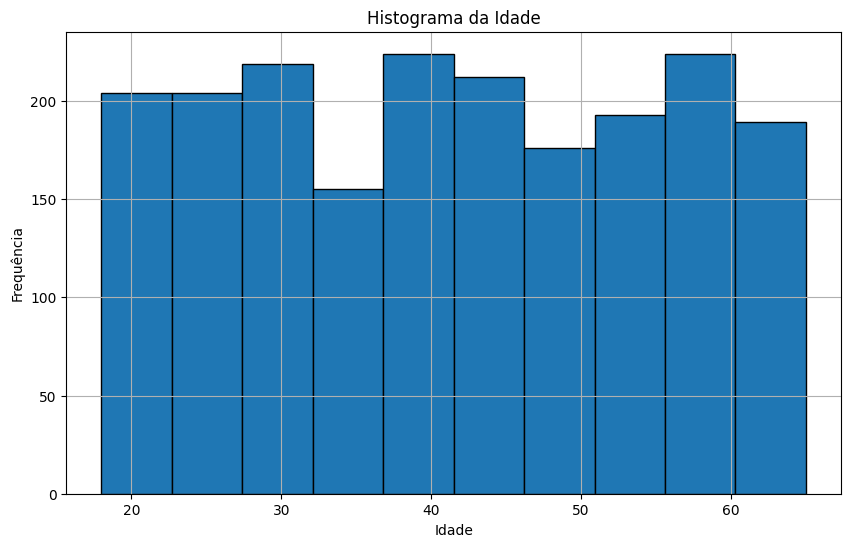

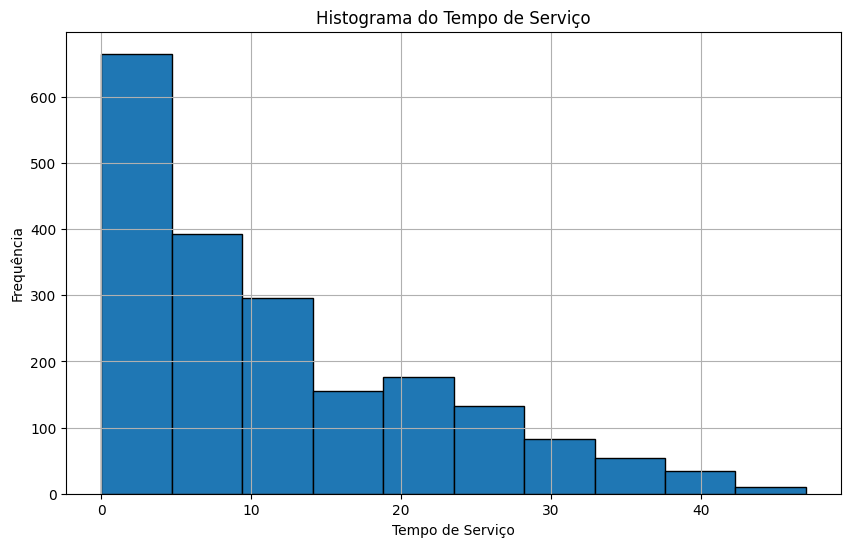

In [34]:
# prompt: Gerar histograma para as variáveis idade e tempo de serviço separadamente

import matplotlib.pyplot as plt

# Histograma para a variável 'idade'
plt.figure(figsize=(10, 6))
plt.hist(df['idade'], bins=10, edgecolor='black')  # Ajuste o número de bins conforme necessário
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma para a variável 'tempo_servico'
plt.figure(figsize=(10, 6))
plt.hist(df['tempo_servico'], bins=10, edgecolor='black')  # Ajuste o número de bins conforme necessário
plt.title('Histograma do Tempo de Serviço')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


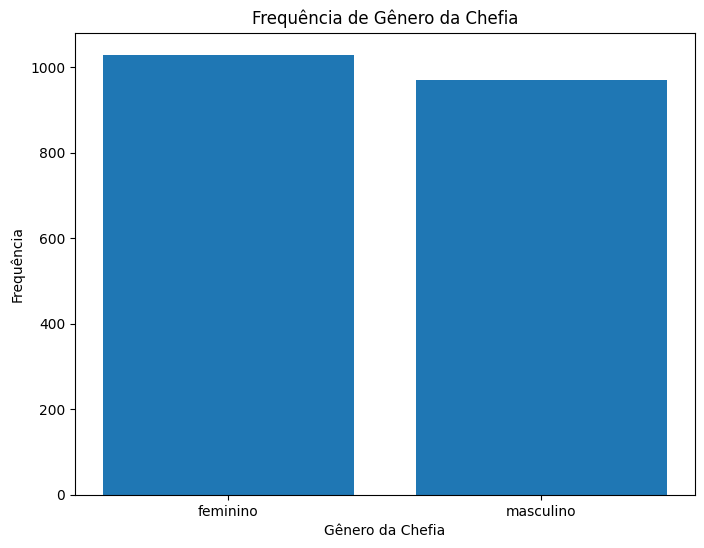

In [35]:
# prompt: Gerar grafico de coluna para genero_chefia com os valores respectivos em cada coluna

import matplotlib.pyplot as plt

# Frequência
freq_genero_chefia = df['genero_chefia'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))  # Ajustar o tamanho da figura
plt.bar(freq_genero_chefia.index, freq_genero_chefia.values)
plt.xlabel("Gênero da Chefia")
plt.ylabel("Frequência")
plt.title("Frequência de Gênero da Chefia")
plt.show()


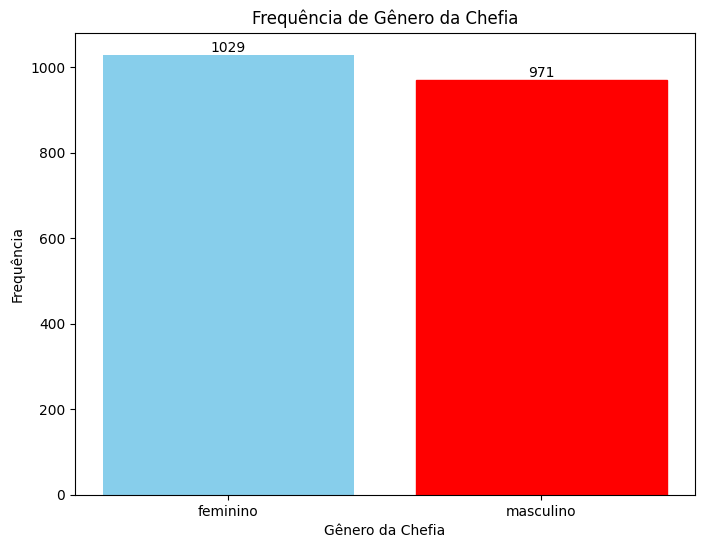

In [36]:
# prompt: Gerar grafico de coluna para genero_chefia com os valores respectivos em cada coluna, sendo o masculino vermelho. Adicione os valores das colunas

import matplotlib.pyplot as plt

# Frequência
freq_genero_chefia = df['genero_chefia'].value_counts()

# Criar o gráfico de barras com cores personalizadas e valores acima das barras
plt.figure(figsize=(8, 6))
bars = plt.bar(freq_genero_chefia.index, freq_genero_chefia.values, color=['skyblue', 'red'])

# Adicionar valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel("Gênero da Chefia")
plt.ylabel("Frequência")
plt.title("Frequência de Gênero da Chefia")

# Definir a cor da barra masculina como vermelha
bars[1].set_color('red')

plt.show()


Vamos trabalhar diretamente com as medidas de tendência central agora.

In [18]:
# prompt: Média de idade os funcionários por sexo

# Média de idade dos funcionários por sexo
media_idade_por_sexo = df.groupby('sexo')['idade'].mean()
media_idade_por_sexo


<ipython-input-18-438864bd38fd>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_idade_por_sexo = df.groupby('sexo')['idade'].mean()


,idade
sexo,
feminino,40.801402
masculino,41.774153


In [37]:
# prompt: Mediana de idade por sexo

# Média de idade dos funcionários por sexo
media_idade_por_sexo = df.groupby('sexo')['idade'].mean()
print(media_idade_por_sexo)

# Mediana de idade dos funcionários por sexo
mediana_idade_por_sexo = df.groupby('sexo')['idade'].median()
mediana_idade_por_sexo


sexo
feminino     40.857143
masculino    42.027411
Name: idade, dtype: float64


<ipython-input-37-94d6b264f82a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_idade_por_sexo = df.groupby('sexo')['idade'].mean()
<ipython-input-37-94d6b264f82a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_idade_por_sexo = df.groupby('sexo')['idade'].median()


,idade
sexo,
feminino,41.0
masculino,42.0


In [38]:
# prompt: Média da avaliacao_desempenho por sexo

# Média da avaliação de desempenho por sexo
media_avaliacao_por_sexo = df.groupby('sexo')['avaliacao_desempenho'].mean()
media_avaliacao_por_sexo


<ipython-input-38-ecf8d94c9124>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_avaliacao_por_sexo = df.groupby('sexo')['avaliacao_desempenho'].mean()


,avaliacao_desempenho
sexo,
feminino,3.079803
masculino,3.002030


In [21]:
# prompt: mediana da avaliacao_desempenho por sexo

# Mediana da avaliação de desempenho por sexo
mediana_avaliacao_por_sexo = df.groupby('sexo')['avaliacao_desempenho'].median()
mediana_avaliacao_por_sexo


<ipython-input-21-1e9ee68570e2>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_avaliacao_por_sexo = df.groupby('sexo')['avaliacao_desempenho'].median()


,avaliacao_desempenho
sexo,
feminino,3.0
masculino,3.0


In [45]:
# prompt: Gerar média e mediana do salario por sexo e organizar o resultado em uma tabela

import pandas as pd
# Média e mediana do salário por sexo
media_salario_por_sexo = df.groupby('sexo')['salario'].mean()
mediana_salario_por_sexo = df.groupby('sexo')['salario'].median()

# Criar um DataFrame com os resultados
tabela_salario_por_sexo = pd.DataFrame({
    'Média Salarial': media_salario_por_sexo,
    'Mediana Salarial': mediana_salario_por_sexo
})

# Exibir a tabela
tabela_salario_por_sexo


<ipython-input-45-61098b6eec06>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salario_por_sexo = df.groupby('sexo')['salario'].mean()
<ipython-input-45-61098b6eec06>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_salario_por_sexo = df.groupby('sexo')['salario'].median()


,Média Salarial,Mediana Salarial
sexo,,
feminino,3596.650246,3490.0
masculino,3617.126904,3520.0


<ipython-input-41-d83d9e79734c>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(df['salario'], labels=['Salário'], showmeans=True)


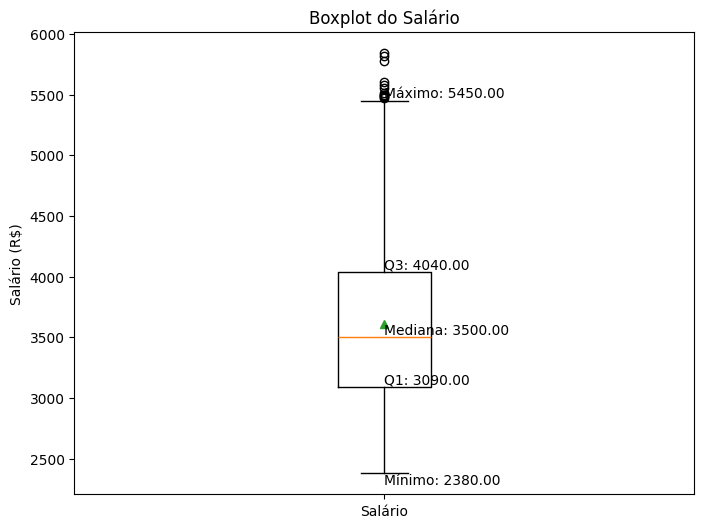

In [41]:
# prompt: Gerar boxplot do salario, adicionando os valores nos 5 numeros (labels)

import matplotlib.pyplot as plt

# Crie o boxplot
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(df['salario'], labels=['Salário'], showmeans=True)

# Obtenha os 5 números do boxplot
minimo = boxplot['caps'][0].get_ydata()[0]
q1 = boxplot['boxes'][0].get_ydata()[0]
mediana = boxplot['medians'][0].get_ydata()[0]
q3 = boxplot['boxes'][0].get_ydata()[2]
maximo = boxplot['caps'][1].get_ydata()[0]

# Adicione os valores dos 5 números ao gráfico
plt.text(1, minimo, f'Mínimo: {minimo:.2f}', va='top')
plt.text(1, q1, f'Q1: {q1:.2f}', va='bottom')
plt.text(1, mediana, f'Mediana: {mediana:.2f}', va='bottom')
plt.text(1, q3, f'Q3: {q3:.2f}', va='bottom')
plt.text(1, maximo, f'Máximo: {maximo:.2f}', va='bottom')

plt.title('Boxplot do Salário')
plt.ylabel('Salário (R$)')
plt.show()


<ipython-input-46-0167d44479dc>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot([df[df['sexo'] == 'feminino']['salario'],


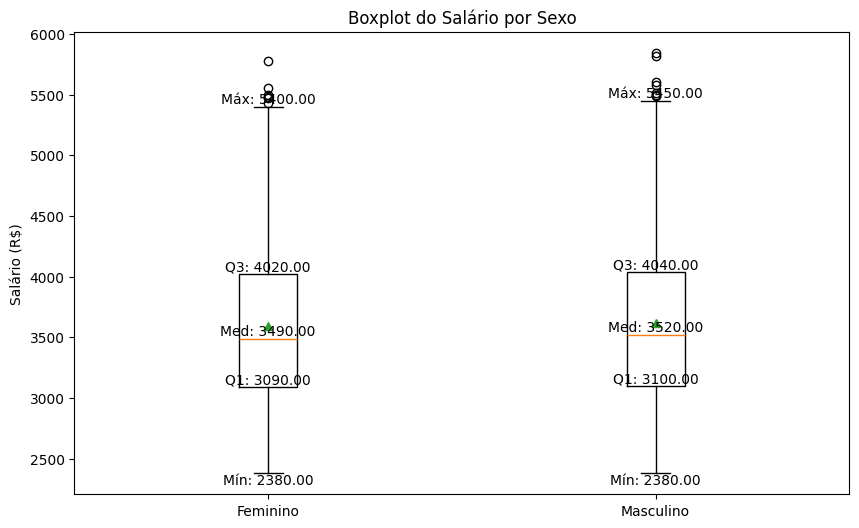

In [46]:
# prompt: Gerar boxplot do salario por sexo, adicionando os valores dos 5 numeros (labels)

import matplotlib.pyplot as plt
# Crie o boxplot com os valores dos 5 números para cada sexo
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([df[df['sexo'] == 'feminino']['salario'],
                       df[df['sexo'] == 'masculino']['salario']],
                       labels=['Feminino', 'Masculino'],
                       showmeans=True)

# Adicione os valores dos 5 números ao gráfico para cada sexo
for i, label in enumerate(['Feminino', 'Masculino']):
    minimo = boxplot['caps'][2*i].get_ydata()[0]
    q1 = boxplot['boxes'][i].get_ydata()[0]
    mediana = boxplot['medians'][i].get_ydata()[0]
    q3 = boxplot['boxes'][i].get_ydata()[2]
    maximo = boxplot['caps'][2*i+1].get_ydata()[0]

    plt.text(i+1, minimo, f'Mín: {minimo:.2f}', va='top', ha='center')
    plt.text(i+1, q1, f'Q1: {q1:.2f}', va='bottom', ha='center')
    plt.text(i+1, mediana, f'Med: {mediana:.2f}', va='bottom', ha='center')
    plt.text(i+1, q3, f'Q3: {q3:.2f}', va='bottom', ha='center')
    plt.text(i+1, maximo, f'Máx: {maximo:.2f}', va='bottom', ha='center')

plt.title('Boxplot do Salário por Sexo')
plt.ylabel('Salário (R$)')
plt.show()


<ipython-input-58-17c410c8563a>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot([df_no_outliers[df_no_outliers['sexo'] == 'feminino']['salario'],


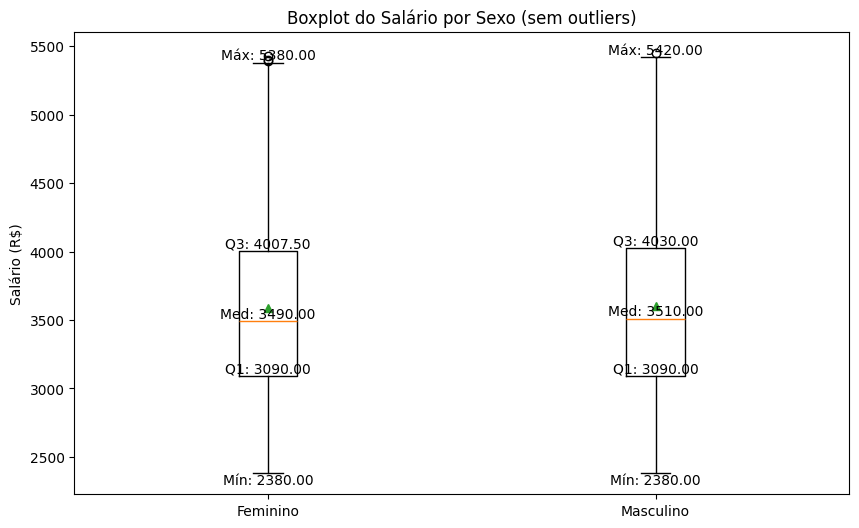

In [58]:
# prompt: Fazer tratamento para evitar outlier com a regra de 1,5 do intervalo interquartilico e apresentar o resultado em boxplot por sexo com os labels dos 5 numeros

import pandas as pd
import matplotlib.pyplot as plt

# ... (código anterior permanece inalterado)

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Aplicar a função para remover outliers da coluna 'salario'
df_no_outliers = remove_outliers_iqr(df, 'salario')

# Crie o boxplot com os valores dos 5 números para cada sexo após a remoção dos outliers
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([df_no_outliers[df_no_outliers['sexo'] == 'feminino']['salario'],
                       df_no_outliers[df_no_outliers['sexo'] == 'masculino']['salario']],
                       labels=['Feminino', 'Masculino'],
                       showmeans=True)

# Adicione os valores dos 5 números ao gráfico para cada sexo
for i, label in enumerate(['Feminino', 'Masculino']):
    minimo = boxplot['caps'][2*i].get_ydata()[0]
    q1 = boxplot['boxes'][i].get_ydata()[0]
    mediana = boxplot['medians'][i].get_ydata()[0]
    q3 = boxplot['boxes'][i].get_ydata()[2]
    maximo = boxplot['caps'][2*i+1].get_ydata()[0]

    plt.text(i+1, minimo, f'Mín: {minimo:.2f}', va='top', ha='center')
    plt.text(i+1, q1, f'Q1: {q1:.2f}', va='bottom', ha='center')
    plt.text(i+1, mediana, f'Med: {mediana:.2f}', va='bottom', ha='center')
    plt.text(i+1, q3, f'Q3: {q3:.2f}', va='bottom', ha='center')
    plt.text(i+1, maximo, f'Máx: {maximo:.2f}', va='bottom', ha='center')

plt.title('Boxplot do Salário por Sexo (sem outliers)')
plt.ylabel('Salário (R$)')
plt.show()


In [48]:
# prompt: Verificar o coeficiente de variação e o desvio padrao do salario e interprete o resultado

import pandas as pd

# ... (código anterior) ...

# Cálculo do desvio padrão e coeficiente de variação do salário
std_salario = df['salario'].std()
cv_salario = (std_salario / df['salario'].mean()) * 100

print(f"Desvio padrão do salário: {std_salario:.2f}")
print(f"Coeficiente de variação do salário: {cv_salario:.2f}%")

# Interpretação
print("\nInterpretação:")
print(f"O desvio padrão do salário é de {std_salario:.2f}, indicando a dispersão dos valores em relação à média.")
if cv_salario < 15:
    print(f"O coeficiente de variação do salário é de {cv_salario:.2f}%, indicando baixa variabilidade.")
elif 15 <= cv_salario <= 30:
  print(f"O coeficiente de variação do salário é de {cv_salario:.2f}%, indicando uma variabilidade moderada.")
else:
    print(f"O coeficiente de variação do salário é de {cv_salario:.2f}%, indicando alta variabilidade.")


Desvio padrão do salário: 672.55
Coeficiente de variação do salário: 18.65%

Interpretação:
O desvio padrão do salário é de 672.55, indicando a dispersão dos valores em relação à média.
O coeficiente de variação do salário é de 18.65%, indicando uma variabilidade moderada.


Correlação entre salário e idade: 0.69
Existe uma forte correlação positiva entre salário e idade.


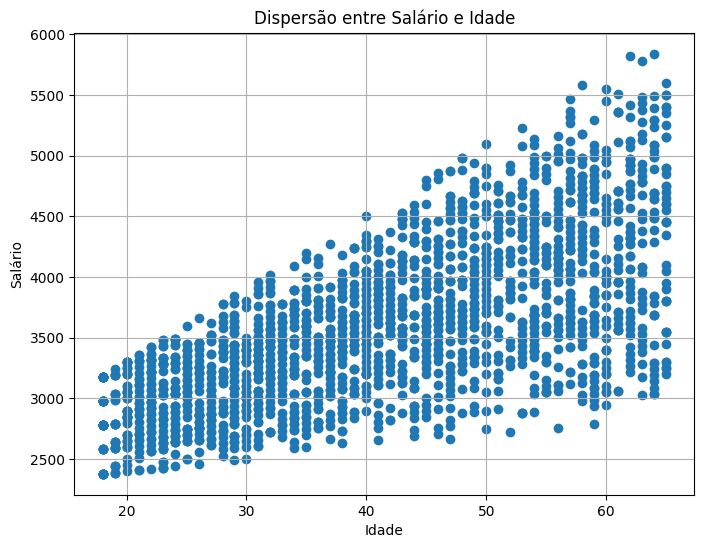

In [49]:
# prompt: Verificar correlação entre salario e idade

import matplotlib.pyplot as plt
# Cálculo da correlação entre salário e idade
correlation = df['salario'].corr(df['idade'])

print(f"Correlação entre salário e idade: {correlation:.2f}")

# Interpretação da correlação
if correlation > 0.5:
    print("Existe uma forte correlação positiva entre salário e idade.")
elif 0.3 <= correlation <= 0.5:
    print("Existe uma correlação positiva moderada entre salário e idade.")
elif -0.3 <= correlation < 0.3 :
    print("Existe uma correlação fraca entre salário e idade.")
elif -0.5 <= correlation < -0.3 :
    print("Existe uma correlação negativa moderada entre salário e idade.")
else:
    print("Existe uma forte correlação negativa entre salário e idade.")

# Gráfico de dispersão para visualizar a relação entre salário e idade
plt.figure(figsize=(8, 6))
plt.scatter(df['idade'], df['salario'])
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.title('Dispersão entre Salário e Idade')
plt.grid(True)
plt.show()


Correlação entre salário e idade: 0.69


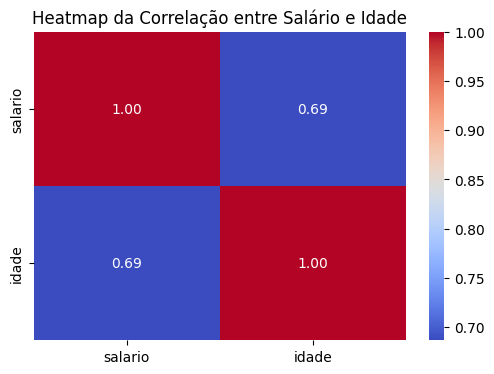

In [51]:
# prompt: Criar heatmap com correlação entre salario e idade

import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo da correlação entre salário e idade
correlation = df['salario'].corr(df['idade'])

print(f"Correlação entre salário e idade: {correlation:.2f}")

# Criando o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['salario', 'idade']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Correlação entre Salário e Idade')
plt.show()


Haverá um erro no resultado a seguir. Qual o motivo?

In [53]:
# prompt: Criar heatmap de correlação de salario por estado

import matplotlib.pyplot as plt
# Cálculo da correlação entre salário e idade por estado
correlation_by_state = df.groupby('Estado')[['salario']].corr()

# Extraindo apenas a correlação entre salário e idade
correlation_salario_idade_por_estado = correlation_by_state['salario'].unstack()

# Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_salario_idade_por_estado.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Correlação entre Salário por Estado')
plt.xlabel('Estado')
plt.ylabel('Correlação')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'to_frame'

<Figure size 1000x600 with 0 Axes>


Vamos verificar a associação entre variáveis qualitativas. Podemos usar os seguintes testes:

Teste do Qui-quadrado: Avalia a associação entre categorias em tabelas de contingência.

Coeficiente de Cramér V: Mede a força da associação entre variáveis qualitativas.



In [55]:
# prompt: gerar teste do qui-quadrado para verificar a estado e sexo

import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# ... (código anterior) ...

# Tabela de contingência entre Estado e Sexo
contingency_table = pd.crosstab(df['Estado'], df['sexo'])

# Teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Qui-quadrado: {chi2}")
print(f"Valor-p: {p}")
print(f"Graus de liberdade: {dof}")

# Interpretação do valor-p
alpha = 0.05
if p < alpha:
    print("Existe uma associação estatisticamente significativa entre o estado e o sexo.")
else:
    print("Não existe uma associação estatisticamente significativa entre o estado e o sexo.")

# Cálculo do coeficiente de Cramer V
n = contingency_table.sum().sum()
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) -1)))

print(f"Coeficiente de Cramer V: {v:.3f}")


Qui-quadrado: 10.279740973814025
Valor-p: 0.3283169777547645
Graus de liberdade: 9
Não existe uma associação estatisticamente significativa entre o estado e o sexo.
Coeficiente de Cramer V: 0.072


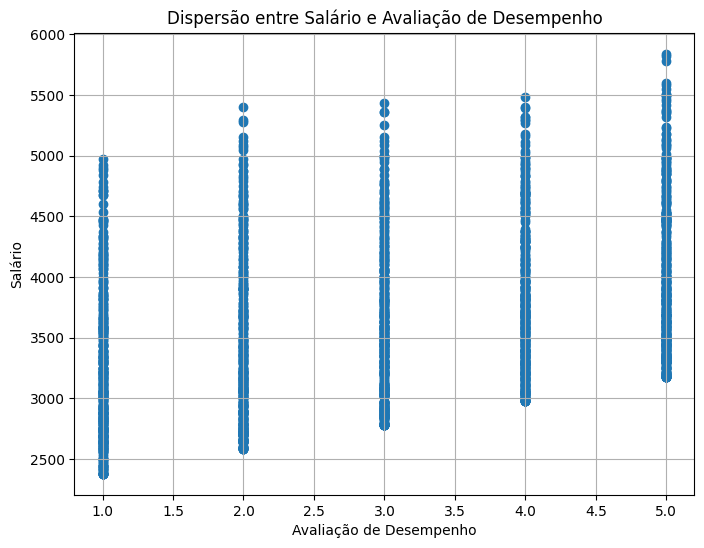

In [64]:
# prompt: Criar grafico de dispersao de salario e avaliacao de desempenho

import matplotlib.pyplot as plt
# Gráfico de dispersão entre salário e avaliação de desempenho
plt.figure(figsize=(8, 6))
plt.scatter(df['avaliacao_desempenho'], df['salario'])
plt.xlabel('Avaliação de Desempenho')
plt.ylabel('Salário')
plt.title('Dispersão entre Salário e Avaliação de Desempenho')
plt.grid(True)
plt.show()
